## Feature Engineering  of numerical and categorical data

In [44]:
import numpy as np
import pandas as pd
from collections import Counter

# pandas display data frames as tables
from IPython.display import display, HTML

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [6]:
# setting params

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

sns.set_style('whitegrid')
sns.set_context('talk')


In [7]:
# load dataset 
credit_df = pd.read_excel('credit_default.xls',
                             skiprows=1,index_col=0)
credit_df.shape

(30000, 24)

In [8]:
credit_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
credit_df[['LIMIT_BAL','BILL_AMT1',
                   'BILL_AMT2','BILL_AMT3',
                   'BILL_AMT4','BILL_AMT5',
                   'BILL_AMT6']].head()

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
ID,,,,,,,
1,20000,3913,3102,689,0,0,0
2,120000,2682,1725,2682,3272,3455,3261
3,90000,29239,14027,13559,14331,14948,15549
4,50000,46990,48233,49291,28314,28959,29547
5,50000,8617,5670,35835,20940,19146,19131


In [12]:
# utility function
def default_month_count(row):
    count = 0 
    for i in [0,2,3,4,5,6]:
        if row['PAY_'+str(i)] > 0:
            count +=1
    return count

In [14]:
credit_df['number_of_default_months'] = credit_df.apply(default_month_count,axis=1)


credit_df[['number_of_default_months']].head()

,number_of_default_months
ID,
1,2
2,2
3,0
4,0
5,0


In [15]:
# Binarization

credit_df['has_ever_defaulted'] = credit_df.number_of_default_months.apply(
    lambda x: 1 if x>0 else 0)

credit_df[['number_of_default_months','has_ever_defaulted']].head()

,number_of_default_months,has_ever_defaulted
ID,,
1,2,1
2,2,1
3,0,0
4,0,0
5,0,0


Text(0.5, 0, 'Frequency')

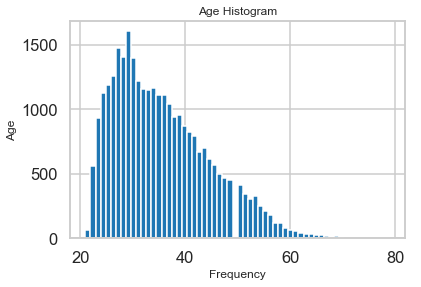

In [17]:
# Binning

credit_df.AGE.plot(kind='hist',bins=60)
plt.title('Age Histogram', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.xlabel('Frequency', fontsize=12)

In [20]:
# Assign a bin label to each row

credit_df['age_bin_fixed'] = credit_df.AGE.apply(
    lambda age: np.floor(age/10.))

credit_df[['AGE','age_bin_fixed']].head()

,AGE,age_bin_fixed
ID,,
1,24,2.0
2,26,2.0
3,34,3.0
4,37,3.0
5,57,5.0


In [21]:
# Quantile binning

quantile_list = [0, .25, .5, .75, 1.]
quantiles = credit_df.AGE.quantile(quantile_list)
quantiles

0.00    21.0
0.25    28.0
0.50    34.0
0.75    41.0
1.00    79.0
Name: AGE, dtype: float64

Text(0, 0.5, 'Frequency')

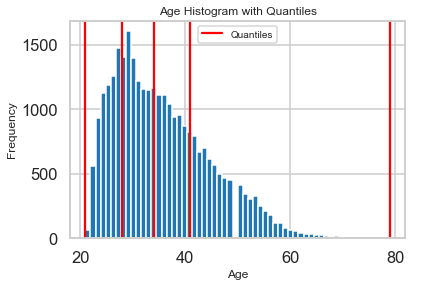

In [27]:
fig, ax = plt.subplots()
credit_df.AGE.plot(kind='hist',bins=60)

for quantile in quantiles:
    qvl = plt.axvline(quantile, color='r')
ax.legend([qvl], ['Quantiles'], fontsize=10)

ax.set_title('Age Histogram with Quantiles', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

In [28]:
# Assign Quartile Bin Labels

quantile_labels = ['Q1', 'Q2', 'Q3', 'Q4']
credit_df['age_quantile_range'] = pd.qcut(credit_df['AGE'],
                                          q=quantile_list)

credit_df['age_quantile_label'] = pd.qcut(credit_df['AGE'],
                                          q=quantile_list,
                                          labels=quantile_labels)

In [29]:
credit_df[['AGE','age_quantile_range','age_quantile_label']].head()

,AGE,age_quantile_range,age_quantile_label
ID,,,
1,24,"(20.999, 28.0]",Q1
2,26,"(20.999, 28.0]",Q1
3,34,"(28.0, 34.0]",Q2
4,37,"(34.0, 41.0]",Q3
5,57,"(41.0, 79.0]",Q4


-

In [30]:
# Feature Engineering: Categorical Data from Games of Thrones

In [31]:
battles_df = pd.read_csv('battles.csv')

battles_df.shape

FileNotFoundError: [Errno 2] File b'battles.csv' does not exist: b'battles.csv'

In [ ]:
battles_df[['name','year','attacker_king','attacker_1']].head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

attacker_le = LabelEncoder()
attacker_labels = attacker_le.fit_transform(battles_df.attacker_1)
attacker_mappings = {index: label for index, label in enumerate(attacker_le.classes_)}

attacker_mappings

In [ ]:
# assign labels

battles_df['attacker1_label'] = attacker_labels
battles_df[['name','year','attacker_king','attacker_1','attacker1_label']].head()

In [34]:
sales_df = pd.DataFrame(data={
                            'items_sold':abs(np.random.randn(7)*100),
                             'day_of_week':['Monday', 'Tuesday',
                                            'Wednesday', 'Thursday', 
                                            'Friday', 'Saturday', 
                                            'Sunday']})
sales_df

,items_sold,day_of_week
0,126.559433,Monday
1,98.920566,Tuesday
2,86.408469,Wednesday
3,112.080929,Thursday
4,126.135032,Friday
5,111.205282,Saturday
6,128.946955,Sunday


In [37]:
day_map = {'Monday': 1, 'Tuesday': 2, 
           'Wednesday': 3, 'Thursday': 4, 
           'Friday': 5, 'Saturday': 6, 
           'Sunday' : 7}

sales_df['weekday_label'] = sales_df['day_of_week'].map(day_map)

In [38]:
sales_df.head()

,items_sold,day_of_week,weekday_label
0,126.559433,Monday,1
1,98.920566,Tuesday,2
2,86.408469,Wednesday,3
3,112.080929,Thursday,4
4,126.135032,Friday,5


In [ ]:
# Encoding Categoricals - One Hot Encoding

In [40]:
from sklearn.preprocessing import OneHotEncoder

day_le = LabelEncoder()
day_labels = day_le.fit_transform(sales_df['day_of_week'])
sales_df['label_encoder_day_label'] = day_labels

# encode day labels using one-hot encoding scheme
day_ohe = OneHotEncoder()
day_feature_arr = day_ohe.fit_transform(sales_df[['label_encoder_day_label']]).toarray()
day_feature_labels = list(day_le.classes_)
day_features = pd.DataFrame(day_feature_arr, columns=day_feature_labels)

/Users/junxxx/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [41]:
sales_ohe_df = pd.concat([sales_df, day_features], axis=1)

sales_ohe_df

,items_sold,day_of_week,weekday_label,label_encoder_day_label,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,126.559433,Monday,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,98.920566,Tuesday,2,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,86.408469,Wednesday,3,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,112.080929,Thursday,4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,126.135032,Friday,5,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,111.205282,Saturday,6,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,128.946955,Sunday,7,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [42]:
# dummy encoder

day_dummy_features = pd.get_dummies(sales_df['day_of_week'], drop_first=True)
pd.concat([sales_df[['day_of_week','items_sold']], day_dummy_features], axis=1)

,day_of_week,items_sold,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,Monday,126.559433,1,0,0,0,0,0
1,Tuesday,98.920566,0,0,0,0,1,0
2,Wednesday,86.408469,0,0,0,0,0,1
3,Thursday,112.080929,0,0,0,1,0,0
4,Friday,126.135032,0,0,0,0,0,0
5,Saturday,111.205282,0,1,0,0,0,0
6,Sunday,128.946955,0,0,1,0,0,0
